In [1]:
import numpy as np
import pandas as pd
from src.dataloader_ import *
from src.network_ import *
from src.utils import *
from src.feature_engineering import feature_engineering, Feature

import os
import sys
import gc
import pickle
import numpy as np
import pandas as pd

train_series_dir = "../../inputs/series_train.parquet/"
test_series_dir = "../../inputs/series_test.parquet/"

data_dic_path = "../../inputs/data_dictionary.csv"
sample_submission_path = "../../inputs/sample_submission.csv"
train_path = "../../inputs/train.csv"
test_path = "../../inputs/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_submission_path)
data_dic = pd.read_csv(data_dic_path)

import os
import random

import numpy as np
import torch


def seed_torch(seed=1029):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


feature = Feature()

seed_torch(seed=42)

In [2]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [3]:
from glob import glob

id_list = []

for path_ in glob(os.path.join(train_series_dir, "**/*.parquet")):
    id_ = path_.split("/")[-2]
    id_list.append(id_.replace("id=", ""))

# train = train[train["id"].isin(id_list)]
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [4]:
train = feature_engineering(train)

before_cols = train.columns
train = train[feature.featuresCols]
after_cols = train.columns

print(f"{len(before_cols)} -> {len(after_cols)}")

before_length = len(train)
null_train = train[train["sii"].isnull()].reset_index(drop=True)
train = train[~train["sii"].isnull()].reset_index(drop=True)

# train["sii"] = train["sii"].fillna(-1)
after_length = len(train)
print(f"{before_length} -> {after_length}")
train

86 -> 64
3960 -> 2736


,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,FMI_BFP,LST_TBW,BFP_BMR,BFP_DEE,BMR_Weight,DEE_Weight,SMM_Height,Muscle_to_Fat,Hydration_Status,ICW_TBW
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,...,0.332267,1.190475,8591.822097,13746.944840,18.356260,29.370079,0.424811,6.383063,0.643522,0.747453
1,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,0.305154,1.458119,3719.320478,5950.914352,20.362087,32.579348,0.321056,12.718037,0.588157,0.777492
2,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,0.224196,1.281264,21298.377749,36207.411592,13.865564,23.571569,0.472854,6.274343,0.563684,0.661008
4,13,1,50.0,22.279952,59.5,112.2,NaN,60.0,73.0,102.0,...,0.198595,1.262516,90468.027355,135701.701175,11.862478,17.793672,0.594629,2.621003,0.562625,0.521399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,8,0,NaN,17.139810,52.5,67.2,25.0,60.0,65.0,112.0,...,0.255085,1.343482,15184.201563,25813.157324,15.405804,26.189881,0.385990,5.416433,0.546400,0.700249
2732,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,105.0,...,0.292827,1.425131,1367.006219,1777.103699,20.735773,26.956438,0.373066,43.676843,0.644749,0.667565
2733,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,104.0,...,0.198595,1.254711,13985.687504,23775.715110,14.646602,24.899272,0.500487,12.939628,0.641165,0.631642
2734,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,...,0.195299,1.310804,42623.022658,68197.040233,11.418397,18.269490,0.479653,4.334530,0.496020,0.623919


In [5]:
from sklearn.metrics import cohen_kappa_score

if np.any(np.isinf(train)):
    train = train.replace([np.inf, -np.inf], np.nan)


def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights="quadratic")


def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(
        oof_non_rounded < thresholds[0],
        0,
        np.where(
            oof_non_rounded < thresholds[1],
            1,
            np.where(oof_non_rounded < thresholds[2], 2, 3),
        ),
    )


def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

In [6]:
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize
from tqdm import tqdm
import lightgbm as lgb

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof = np.zeros(len(train))

train_S = []
test_S = []

X = train.drop(["sii"], axis=1)
y = train["sii"]

oof_non_rounded = np.zeros(len(y), dtype=float)
oof_rounded = np.zeros(len(y), dtype=int)
# test_preds = np.zeros((len(test_data), n_splits))

Params = {
    "learning_rate": 0.046,
    "max_depth": 12,
    "num_leaves": 478,
    "min_data_in_leaf": 13,
    "feature_fraction": 0.893,
    "bagging_fraction": 0.784,
    "bagging_freq": 4,
    "lambda_l1": 10,  # Increased from 6.59
    "lambda_l2": 0.01,  # Increased from 2.68e-06
}

for fold, (train_idx, test_idx) in enumerate(SKF.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

    model = lgb.LGBMRegressor(
        **Params,
        random_state=42,
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    oof_non_rounded[test_idx] = y_val_pred
    y_val_pred_rounded = y_val_pred.round(0).astype(int)
    oof_rounded[test_idx] = y_val_pred_rounded

    train_kappa = quadratic_weighted_kappa(y_train, y_train_pred.round(0).astype(int))
    val_kappa = quadratic_weighted_kappa(y_val, y_val_pred_rounded)

    train_S.append(train_kappa)
    test_S.append(val_kappa)

    # test_preds[:, fold] = model.predict(test_data)

    print(
        f"Fold {fold+1} - Train QWK: {train_kappa:.4f}, Validation QWK: {val_kappa:.4f}"
    )
    # clear_output(wait=True)

print(f"Mean Train QWK --> {np.mean(train_S):.4f}")
print(f"Mean Validation QWK ---> {np.mean(test_S):.4f}")

KappaOPtimizer = minimize(
    evaluate_predictions,
    x0=[0.5, 1.5, 2.5],
    args=(y, oof_non_rounded),
    method="Nelder-Mead",
)
assert KappaOPtimizer.success, "Optimization did not converge."

oof_tuned = threshold_Rounder(oof_non_rounded, KappaOPtimizer.x)
tKappa = quadratic_weighted_kappa(y, oof_tuned)

print(f"----> || Optimized QWK SCORE :: {tKappa:.3f}")

[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.784
[LightGBM] [Warning] feature_fraction is set=0.893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.893
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=0.01, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01
Fold 1 - Train QWK: 0.6036, Validation QWK: 0.4035
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] bagging_fraction is set=0.784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.784
[LightGBM] [Warning] feature_fraction is 

In [7]:
# 996-sample ----> || Optimized QWK SCORE :: 0.348

# 2736sample ----> || Optimized QWK SCORE :: 0.452

<Axes: ylabel='Count'>

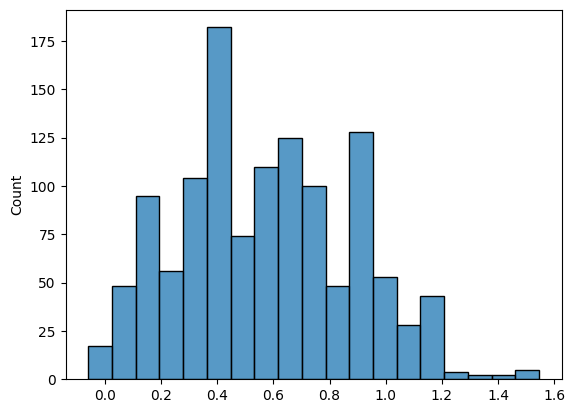

In [10]:
pseudo_label = model.predict(null_train.drop(["sii"], axis=1))

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(pseudo_label)

In [9]:
null_train

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,FMI_BFP,LST_TBW,BFP_BMR,BFP_DEE,BMR_Weight,DEE_Weight,SMM_Height,Muscle_to_Fat,Hydration_Status,ICW_TBW
0,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1,NaN,16.861286,59.25,84.2,27.0,71.0,90.0,116.0,...,0.200275,1.265839,19172.581896,30676.066044,14.014727,22.423515,0.485536,8.840947,0.599486,0.565344
2,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1220,15,1,NaN,22.457960,62.00,122.8,30.0,64.0,60.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,9,0,NaN,20.200490,52.50,79.2,28.0,75.0,92.0,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1222,10,0,NaN,18.764678,53.50,76.4,27.0,60.0,78.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
